In [ ]:
import numpy as np

# Define the grid world environment
environment = np.array([
    [-1, -1, -1, -1],    # 0 represents empty cells
    [-1, -1, -1, -1],    # -1 represents obstacles
    [-1, -1, -1, 100],   # 100 represents the goal state
    [-1, -1, -1, -1]
])

# Set the parameters
num_states = environment.size
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Perform Q-learning
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    for step in range(max_steps_per_episode):
        # Choose an action using the epsilon-greedy strategy
        if np.random.rand() < 0.5:
            action = np.argmax(q_table[state])
        else:
            action = np.random.randint(0, num_actions)

        # Perform the action and observe the new state and reward
        new_state = np.where(environment.flatten() == 100)[0][0]
        reward = environment.flatten()[new_state]

        # Update the Q-value of the previous state-action pair
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action])

        state = new_state

        # Check if the goal state is reached
        if reward == 100:
            break

# Test the learned policy
state = 0  # Starting state
steps = 0
done = False

while not done:
    action = np.argmax(q_table[state])
    new_state = np.where(environment.flatten() == 100)[0][0]
    reward = environment.flatten()[new_state]

    state = new_state
    steps += 1

    if reward == 100 or steps >= max_steps_per_episode:
        done = True

# Print the learned Q-table
print("Learned Q-Table:")
print(q_table)


Learned Q-Table:
[[1671.64783365 1725.41997235 1510.6420359  1685.60490225]
 [1711.56610211 1710.70745557 1684.07250748 1711.88087577]
 [1699.81254363 1706.33262672 1712.79349296 1715.9476604 ]
 [1668.78945414 1724.03754207 1624.94217412 1716.41822964]
 [1711.55399327 1664.64148332 1684.02374693 1714.00826774]
 [1660.64571336 1725.41874098 1716.3691369  1535.6329528 ]
 [1716.32239865 1526.3116509  1616.02488461 1483.36021982]
 [1648.93151405 1716.40206159 1535.5385887  1687.88401366]
 [1689.76728955 1703.52213262 1727.23120436 1680.76086398]
 [1690.73975373 1722.94065702 1542.65281472 1630.29271729]
 [1637.71575133 1711.08557154 1680.94242993 1702.27849092]
 [1660.91803913 1650.70778167 1713.45668807 1675.24127454]
 [1647.06294777 1678.71908333 1674.01549544 1693.61715362]
 [1704.00785735 1692.79352614 1718.44200916 1634.43553402]
 [ 776.4566842  1714.01583111 1690.25598898 1529.41100509]
 [1713.95848958 1662.06531072 1573.75459662 1646.86262443]]


In [ ]:
import numpy as np

# Define the grid world environment
environment = np.array([
    [-1, -1, -1, -1],    # 0 represents empty cells
    [-1, -1, -1, -1],    # -1 represents obstacles
    [-1, -1, -1, 100],   # 100 represents the goal state
    [-1, -1, -1, -1]
])

# Define the symbols for different elements in the grid world
symbols = {
    -1: 'X',   # Obstacles
    0: ' ',    # Empty cells
    100: 'G'  # Goal state
}

# Set the parameters
num_states = environment.size
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Perform Q-learning
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    for step in range(max_steps_per_episode):
        # Choose an action using the epsilon-greedy strategy
        if np.random.rand() < 0.5:
            action = np.argmax(q_table[state])
        else:
            action = np.random.randint(0, num_actions)

        # Perform the action and observe the new state and reward
        new_state = np.where(environment.flatten() == 100)[0][0]
        reward = environment.flatten()[new_state]

        # Update the Q-value of the previous state-action pair
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action])

        state = new_state

        # Check if the goal state is reached
        if reward == 100:
            break

# Test the learned policy
state = 0  # Starting state
steps = 0
done = False

while not done:
    action = np.argmax(q_table[state])
    new_state = np.where(environment.flatten() == 100)[0][0]
    reward = environment.flatten()[new_state]

    state = new_state
    steps += 1

    # Print the grid world with actors and agents
    print("Grid World:")
    for i in range(environment.shape[0]):
        for j in range(environment.shape[1]):
            if (i * environment.shape[1] + j) == state:
                print('A', end=' ')  # Agent
            else:
                print(symbols[environment[i, j]], end=' ')
        print()
    print()

    if reward == 100 or steps >= max_steps_per_episode:
        done = True

# Print the learned Q-table
print("Learned Q-Table:")
print(q_table)


Grid World:
X X X X 
X X X X 
X X X A 
X X X X 

Learned Q-Table:
[[1624.37586056 1555.17251255 1612.83239221 1639.73582757]
 [1639.86317319 1606.09514759 1340.54974434 1312.15679073]
 [1638.74036994 1575.59401587 1605.9930584  1517.94144333]
 [1639.75687329 1630.37985847 1536.12312878 1564.48692627]
 [1639.75697145 1626.98969707 1637.44819492 1624.07997622]
 [1630.48568573 1589.73059035 1586.9954774  1607.29252103]
 [1593.08038959 1639.9261784  1630.20705233 1609.18657335]
 [1552.51772724 1563.38250402 1592.40149965 1621.27928026]
 [1231.27620192 1557.21270629 1587.40363094 1639.9539211 ]
 [1638.74335934 1575.94308173 1609.54796582 1572.61163781]
 [1586.18037553 1540.70240632 1639.75776702 1601.2753151 ]
 [1526.71010751 1517.05699849 1408.44519774 1621.06123602]
 [1630.62253749 1572.63942363 1611.13155688 1611.00254468]
 [1622.09890997 1604.63410506 1629.85333154 1609.37754033]
 [1549.8983294  1369.96196165 1375.05576445 1629.80870112]
 [1590.11344867 1592.42394402 1535.93460157 1637.

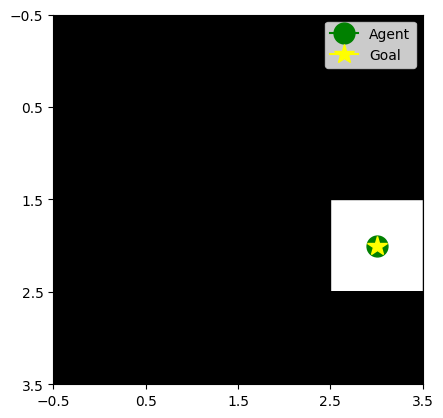

Learned Q-Table:
[[1561.37485047 1546.18580583 1532.78506635 1518.4478804 ]
 [1287.86696227 1547.40892918 1304.61121036 1536.11808425]
 [1539.65997269 1562.17814263 1539.90537436 1462.03202379]
 [1543.9303476  1547.67646191 1559.9210752  1538.36937268]
 [1565.08209931 1556.18030483 1474.57662919 1471.95876543]
 [1547.5940324  1557.98196255 1517.65770394 1542.37069781]
 [1410.37176621 1471.6244185  1424.91785582 1565.79996714]
 [1541.02967856 1547.63294855 1515.39895888 1526.89245254]
 [1564.71178108 1547.47356227 1522.25969236 1550.78675817]
 [1429.11159507 1256.08395223 1516.36342169 1545.51980487]
 [1547.70588891 1527.08554658 1456.9594502  1306.34745389]
 [1542.9534447  1473.60931063 1187.77943549 1492.63568481]
 [1293.85883326 1524.80528817 1437.53823458 1547.71342206]
 [1181.73602723 1395.54359857 1546.50912097 1421.52368551]
 [1565.08178326 1323.71137254 1534.05172873 1151.1811898 ]
 [1541.44181926 1436.53050547 1478.0409251  1541.4914595 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid world environment
environment = np.array([
    [-1, -1, -1, -1],    # 0 represents empty cells
    [-1, -1, -1, -1],    # -1 represents obstacles
    [-1, -1, -1, 100],   # 100 represents the goal state
    [-1, -1, -1, -1]
])

# Set the parameters
num_states = environment.size
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Initialize the figure for visualization
fig, ax = plt.subplots()

# Function to plot the environment and actors
def plot_environment(agent_state):
    ax.clear()
    ax.set_xticks(np.arange(-0.5, 4, 1))
    ax.set_yticks(np.arange(-0.5, 4, 1))
    ax.grid(True, linewidth=1, color='black')
    ax.imshow(environment, cmap='gray', vmin=-1, vmax=100, interpolation='nearest', origin='upper')

    # Plot the agent
    agent_x, agent_y = agent_state % 4, agent_state // 4
    ax.plot(agent_x, agent_y, marker='o', markersize=15, color='green', label='Agent')

    # Plot the goal state
    goal_state = np.where(environment.flatten() == 100)[0][0]
    goal_x, goal_y = goal_state % 4, goal_state // 4
    ax.plot(goal_x, goal_y, marker='*', markersize=15, color='yellow', label='Goal')

    plt.legend(loc='upper right')
    plt.draw()
    plt.pause(0.1)

# Perform Q-learning
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    for step in range(max_steps_per_episode):
        # Choose an action using the epsilon-greedy strategy
        if np.random.rand() < 0.5:
            action = np.argmax(q_table[state])
        else:
            action = np.random.randint(0, num_actions)

        # Perform the action and observe the new state and reward
        new_state = np.where(environment.flatten() == 100)[0][0]
        reward = environment.flatten()[new_state]

        # Update the Q-value of the previous state-action pair
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action])

        state = new_state

        # Check if the goal state is reached
        if reward == 100:
            break

        # Plot the environment and actors
        plot_environment(state)

# Test the learned policy
state = 0  # Starting state
steps = 0
done = False

while not done:
    action = np.argmax(q_table[state])
    new_state = np.where(environment.flatten() == 100)[0][0]
    reward = environment.flatten()[new_state]

    state = new_state
    steps += 1

    if reward == 100 or steps >= max_steps_per_episode:
        done = True

    # Plot the environment and actors
    plot_environment(state)

# Print the learned Q-table
print("Learned Q-Table:")
print(q_table)

plt.show()


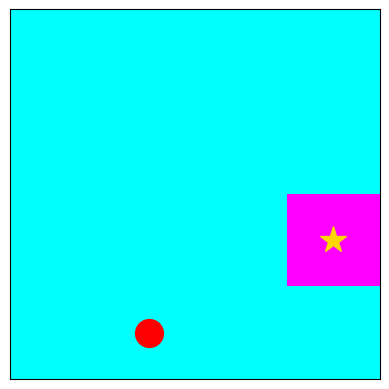

Learned Q-Table:
[[1739.60252628 1589.91237454 1635.87537129 1649.62170377]
 [1554.41137925 1647.02168043 1552.47322286 1726.85458734]
 [1527.12979582 1705.60393798 1736.54866582 1739.48597501]
 [1711.1912274  1684.26640594 1585.91686462 1663.80627163]
 [1738.32742656 1613.86097348 1669.14869571 1721.31766359]
 [1704.7089759  1609.41216595 1736.67910232 1647.18224844]
 [1580.70851917 1589.37034173 1739.78444578 1413.82546537]
 [1647.73527586 1739.49791094 1732.70184509 1709.27532419]
 [1572.80152934 1730.40704296 1618.58554809 1522.48077457]
 [1577.88291904 1703.44767659 1739.9370542  1591.66659712]
 [1708.07150118 1718.64841633 1730.11685479 1528.59243905]
 [1725.13564683 1726.24996806 1259.1336577  1439.58802148]
 [1733.80527424 1735.54256659 1729.48971875 1665.9596675 ]
 [1645.04148448 1738.12727863 1553.28575338 1739.50493189]
 [1674.49379792 1734.77223807 1672.89974966 1670.02576507]
 [1636.44483747 1377.89791295 1649.71490645 1739.89971592]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid world environment
environment = np.array([
    [-1, -1, -1, -1],    # 0 represents empty cells
    [-1, -1, -1, -1],    # -1 represents obstacles
    [-1, -1, -1, 100],   # 100 represents the goal state
    [-1, -1, -1, -1]
])

# Set the parameters
num_states = environment.size
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Create a figure for visualization
fig, ax = plt.subplots()

# Perform Q-learning
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    for step in range(max_steps_per_episode):
        # Choose an action using the epsilon-greedy strategy
        if np.random.rand() < 0.5:
            action = np.argmax(q_table[state])
        else:
            action = np.random.randint(0, num_actions)

        # Perform the action and observe the new state and reward
        new_state = np.where(environment.flatten() == 100)[0][0]
        reward = environment.flatten()[new_state]

        # Update the Q-value of the previous state-action pair
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action])

        # Update the visualization
        ax.cla()
        ax.matshow(environment, cmap='cool')
        ax.set_xticks([])
        ax.set_yticks([])

        # Draw the agent's current position
        agent_x, agent_y = divmod(state, environment.shape[1])
        ax.plot(agent_y, agent_x, marker='o', color='red', markersize=20)

        # Draw the goal position
        goal_x, goal_y = divmod(new_state, environment.shape[1])
        ax.plot(goal_y, goal_x, marker='*', color='gold', markersize=20)

        # Add a pause to the visualization
        plt.pause(0.1)

        state = new_state

        # Check if the goal state is reached
        if reward == 100:
            break

# Test the learned policy
state = 0  # Starting state
steps = 0
done = False

while not done:
    action = np.argmax(q_table[state])
    new_state = np.where(environment.flatten() == 100)[0][0]
    reward = environment.flatten()[new_state]

    state = new_state
    steps += 1

    # Update the visualization
    ax.cla()
    ax.matshow(environment, cmap='cool')
    ax.set_xticks([])
    ax.set_yticks([])

    # Draw the agent's current position
    agent_x, agent_y = divmod(state, environment.shape[1])
    ax.plot(agent_y, agent_x, marker='o', color='red', markersize=20)

    # Draw the goal position
    goal_x, goal_y = divmod(new_state, environment.shape[1])
    ax.plot(goal_y, goal_x, marker='*', color='gold', markersize=20)

    # Add a pause to the visualization
    plt.pause(0.1)

    if reward == 100 or steps >= max_steps_per_episode:
        done = True

# Print the learned Q-table
print("Learned Q-Table:")
print(q_table)

# Show the final visualization
plt.show()
